In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import VarianceThreshold

In [ ]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import time
import seaborn as sns

In [ ]:
import shap

## Load dataset

In [ ]:
# path_out = r'F:\Codes\joint attention\Nano-particle\output_new_new'
# path_out = r'E:\Other Projects\Nano particles - Dr. Harinda\nanoproject-visuolization-sliit\output_new_new'
path_out = r''

file_path_features_norm = os.path.join(path_out , 'features_normalized_35.npy')
file_path_labels = os.path.join(path_out , 'label_r_avg_raw.npy')
file_path_features_original = os.path.join(path_out , 'features_raw_35.npy')

with open( file_path_features_original , 'rb') as f:
    features_orig = np.load(f)
with open( file_path_labels , 'rb') as f:
    labels = np.load(f)
with open( file_path_features_norm , 'rb') as f:
    features_norm = np.load(f)

print(features_orig.shape)
print(labels.shape)
print(features_norm.shape)

(3999, 35)
(3999, 1)
(3999, 35)


In [ ]:
df_original = pd.DataFrame(features_orig, columns=[ f'feature_{i}' for i in range(35)])
df_norm = pd.DataFrame(features_norm, columns=[ f'feature_{i}' for i in range(35)])

In [ ]:
df_original.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34
0,273.0,0.000025,1.0,2.710000e-26,0.0,81.0,119.0,0.0,105.0,229.0,...,8936.0,95.5363,34.169839,24.0,23.0,2.0,8.0,2.5153,2.7535,2.1026
1,273.0,0.000025,2.0,2.780000e-26,0.0,65.0,81.0,1.0,111.0,213.0,...,9090.0,95.5073,34.245992,30.0,35.0,1.0,7.0,2.5335,2.9188,1.8783
2,273.0,0.000025,3.0,7.850000e-26,4.0,204.0,168.0,24.0,306.0,304.0,...,26399.0,96.0506,34.609982,700.0,376.0,0.0,17.0,7.3030,8.4074,4.3813
3,273.0,0.000025,4.0,1.220000e-25,8.0,178.0,246.0,46.0,383.0,282.0,...,40689.0,96.3417,34.742688,1858.0,823.0,0.0,11.0,9.5565,11.0017,5.5250
4,273.0,0.000025,5.0,1.860000e-25,18.0,204.0,269.0,57.0,451.0,328.0,...,62641.0,96.5052,34.859251,3575.0,1350.0,0.0,28.0,9.8630,11.1281,5.5505


In [ ]:
df_norm.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34
0,0.0,0.1,0.000000,0.097059,0.000000,0.030440,0.048902,0.000000,0.037433,0.191472,...,0.096273,0.613760,0.265376,0.002188,0.005046,0.666667,0.048780,0.202272,0.207899,0.218424
1,0.0,0.1,0.111111,0.100000,0.000000,0.024427,0.033154,0.001032,0.039725,0.178094,...,0.098170,0.606908,0.308991,0.002735,0.007679,0.333333,0.042683,0.203906,0.221702,0.192378
2,0.0,0.1,0.222222,0.313025,0.002574,0.076663,0.069208,0.024768,0.114209,0.254181,...,0.311345,0.735269,0.517461,0.063816,0.082492,0.000000,0.103659,0.631955,0.680002,0.483029
3,0.0,0.1,0.333333,0.495798,0.005148,0.066892,0.101533,0.047472,0.143621,0.235786,...,0.487339,0.804045,0.593466,0.169386,0.180562,0.000000,0.067073,0.834201,0.896627,0.615837
4,0.0,0.1,0.444444,0.764706,0.011583,0.076663,0.111065,0.058824,0.169595,0.274247,...,0.757697,0.842674,0.660226,0.325918,0.296183,0.000000,0.170732,0.861708,0.907181,0.618798


In [ ]:
## check norm and

## Visualize data

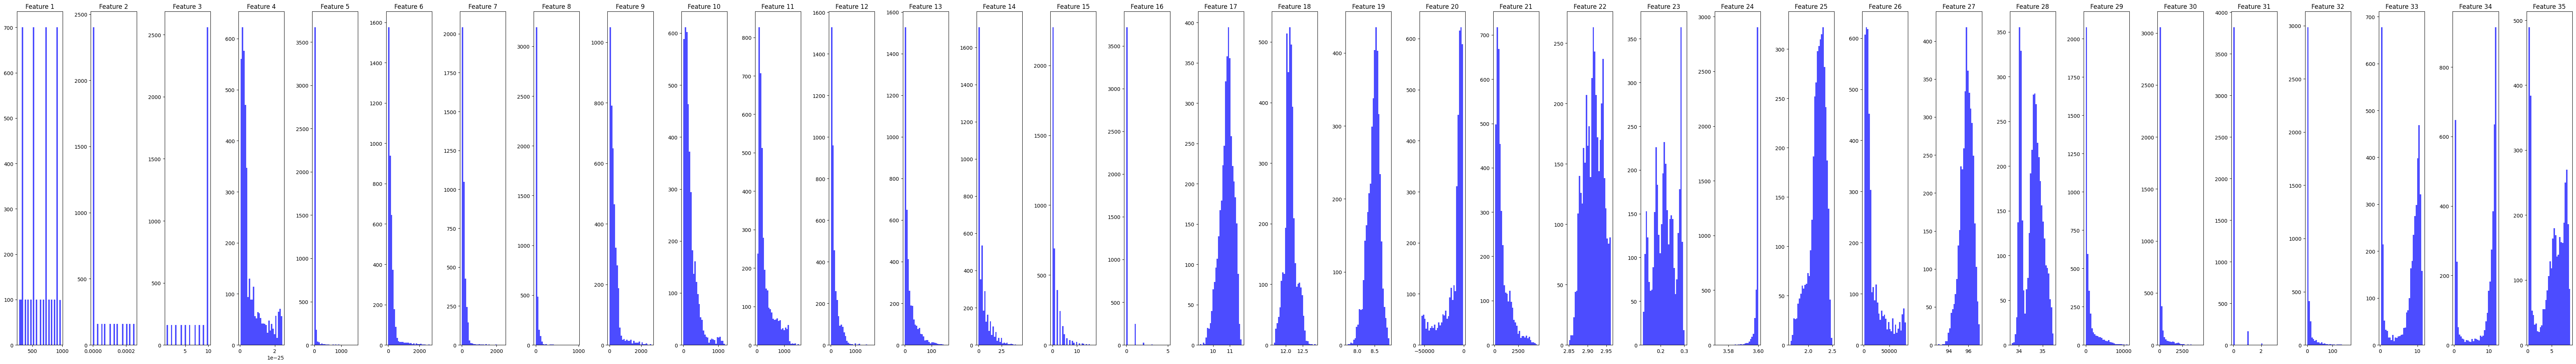

In [ ]:
data = features_orig
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()


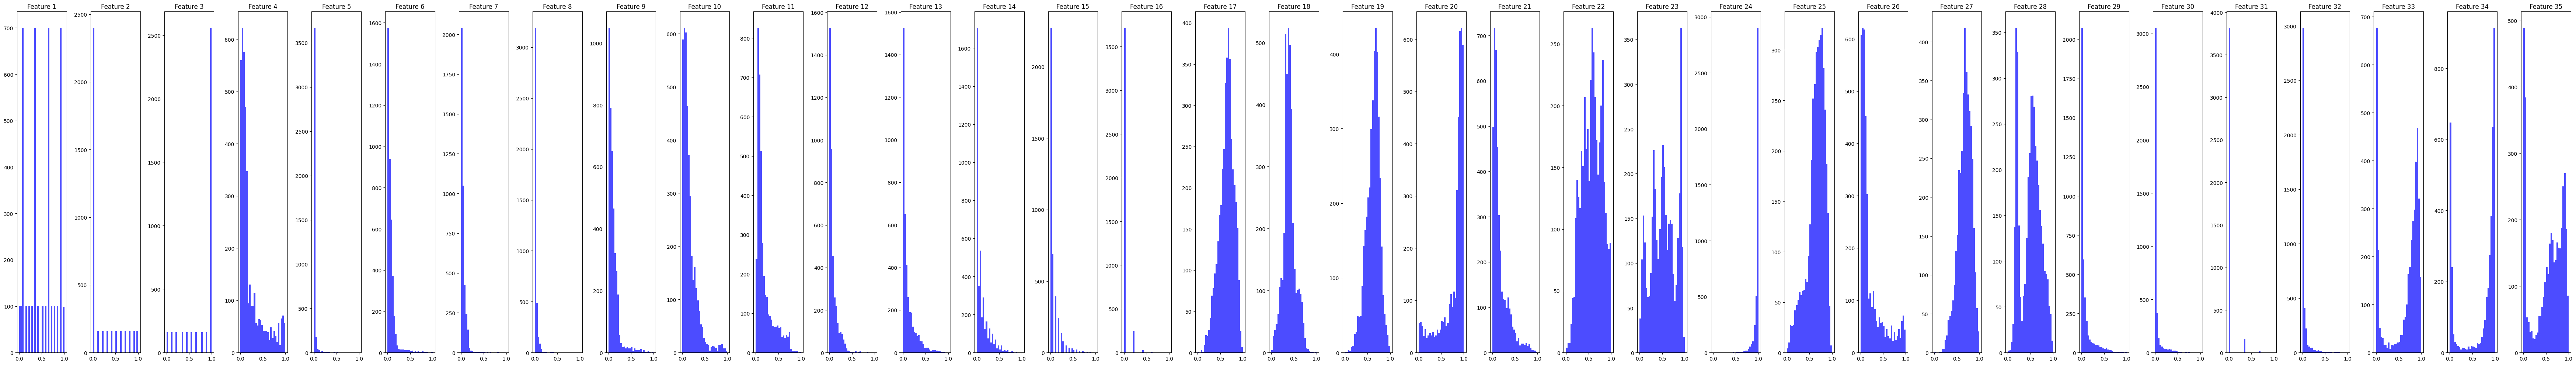

In [ ]:
data = features_norm
fig, axs = plt.subplots(nrows=1, ncols=35, figsize=(70, 10))
for i in range(35):
    axs[i].hist(data[:, i], bins=30, color='blue', alpha=0.7)
    axs[i].set_title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

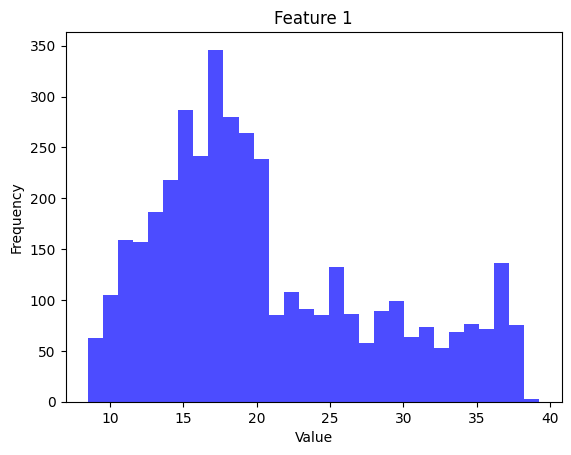

In [ ]:
data = labels
plt.hist(data[:, 0], bins=30, color='blue', alpha=0.7)
plt.title('Feature 1')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## Split the dataset into train , test and validation splits

In [ ]:
# Split data into train and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features_norm, labels, test_size=0.2, random_state=42)

print(f"features train shape: {features_train.shape}")
print(f"features test shape: {features_test.shape}") # tmp
print(f"labels train shape: {labels_train.shape}")
print(f"labes test shape: {labels_test.shape}") # tmp

print(f"features train type: {type(features_train)}")
print(f"features test type: {type(features_test)}")
print(f"labels train type: {type(labels_train)}")
print(f"labes test type: {type(labels_test)}")

#test set again split into actual test and validation sets
features_validation, features_test, labels_validation, labels_test = train_test_split(features_test, labels_test, test_size=0.5, random_state=42)

print(f"features validation shape: {features_validation.shape}")
print(f"features test shape: {features_test.shape}")
print(f"labels validation shape: {labels_validation.shape}")
print(f"labes test shape: {labels_test.shape}")

print(f"features validation type: {type(features_validation)}")
print(f"features test type: {type(features_test)}")
print(f"labels validation type: {type(labels_validation)}")
print(f"labes test type: {type(labels_test)}")

features train shape: (3199, 35)
features test shape: (800, 35)
labels train shape: (3199, 1)
labes test shape: (800, 1)
features train type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels train type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>
features validation shape: (400, 35)
features test shape: (400, 35)
labels validation shape: (400, 1)
labes test shape: (400, 1)
features validation type: <class 'numpy.ndarray'>
features test type: <class 'numpy.ndarray'>
labels validation type: <class 'numpy.ndarray'>
labes test type: <class 'numpy.ndarray'>


In [ ]:
def calc_MAPE_Percentage(actual_list , predicted_list):
#     assert len(predicted_list.shape) ==2
#     assert isinstance(predicted_list, list)
    assert len(actual_list.shape) == 2
    tmp=0
    num_samples = actual_list.shape[0]

    if len(predicted_list.shape) == 2:
#         print('con1')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i,0]))/(np.abs(actual_list[i,0]))
    elif len(predicted_list.shape) == 1:
#         print('con2')
        for i in range(num_samples):
            tmp += (np.abs(actual_list[i,0] - predicted_list[i]))/(np.abs(actual_list[i,0]))
    else:
        raise AssertionError
    MAPD = tmp/num_samples
    MAPD_perc = MAPD*100
    return MAPD_perc


## Model Training

## Ridge Regression

Ridge regression - L2 norm <br>
makes the weights close to zero
![image.png](attachment:image.png)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# X_train, X_test, y_train, y_test = features_train,features_validation,labels_train,labels_validation

ridge = Ridge()

param_grid = {'alpha': np.logspace(-20, 20, 500)} #for 500 finally

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

In [ ]:
grid_search

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-20, 1.20270833e-20, 1.44650734e-20, 1.73972643e-20,
       2.09238348e-20, 2.51652705e-20, 3.02664806e-20, 3.64017485e-20,
       4.37806863e-20, 5.26553963e-20, 6.33290840e-20, 7.61664172e-20,
       9.16059848e-20, 1.10175281e-19, 1.32508729e-19, 1.59369353e-19,
       1.91674849e-19, 2.30528939e-19, 2.77259076e-19, 3....
       1.43321923e+18, 1.72374471e+18, 2.07316213e+18, 2.49340937e+18,
       2.99884423e+18, 3.60673495e+18, 4.33785019e+18, 5.21716858e+18,
       6.27473213e+18, 7.54667263e+18, 9.07644607e+18, 1.09163173e+19,
       1.31291459e+19, 1.57905331e+19, 1.89914058e+19, 2.28411221e+19,
       2.74712079e+19, 3.30398507e+19, 3.97373038e+19, 4.77923865e+19,
       5.74803016e+19, 6.91320378e+19, 8.31456781e+19, 1.00000000e+20])},
             scoring='neg_mean_squared_error')

In [ ]:
param_grid['alpha']

array([1.00000000e-20, 1.20270833e-20, 1.44650734e-20, 1.73972643e-20,
       2.09238348e-20, 2.51652705e-20, 3.02664806e-20, 3.64017485e-20,
       4.37806863e-20, 5.26553963e-20, 6.33290840e-20, 7.61664172e-20,
       9.16059848e-20, 1.10175281e-19, 1.32508729e-19, 1.59369353e-19,
       1.91674849e-19, 2.30528939e-19, 2.77259076e-19, 3.33461802e-19,
       4.01057288e-19, 4.82354943e-19, 5.80132310e-19, 6.97729965e-19,
       8.39165644e-19, 1.00927151e-18, 1.21385926e-18, 1.45991865e-18,
       1.75585633e-18, 2.11178304e-18, 2.53985907e-18, 3.05470967e-18,
       3.67392478e-18, 4.41865996e-18, 5.31435916e-18, 6.39162405e-18,
       7.68725952e-18, 9.24553110e-18, 1.11196773e-17, 1.33737286e-17,
       1.60846948e-17, 1.93451965e-17, 2.32666291e-17, 2.79829688e-17,
       3.36553498e-17, 4.04775697e-17, 4.86827104e-17, 5.85511016e-17,
       7.04198979e-17, 8.46945981e-17, 1.01862899e-16, 1.22511358e-16,
       1.47345431e-16, 1.77213578e-16, 2.13136247e-16, 2.56340741e-16,
      

In [ ]:
name = 'LR - Ridge '
predictions_list = {'train':None,'test':None,'val':None}

training_start = time.time()
grid_search.fit(features_train, labels_train)
training_end = time.time()

best_params = grid_search.best_params_
print("Best parameters: ", best_params)

best_ridge = grid_search.best_estimator_ # returns the best model with the best hyper-parameters

val_start = time.time()
y_pred_validation = best_ridge.predict(features_validation)
val_end = time.time()
predictions_list['val'] = y_pred_validation

y_pred_train = best_ridge.predict(features_train)
predictions_list['train'] = y_pred_train

test_start = time.time()
y_pred_test = best_ridge.predict(features_test)
test_end = time.time()
predictions_list['test'] = y_pred_test

#metrics for train, test and validation
val_rmse = mean_squared_error(labels_validation, predictions_list['val'], squared = False)
val_mse = mean_squared_error(labels_validation, predictions_list['val'], squared = True)
val_mae = mean_absolute_error(labels_validation, predictions_list['val'])
val_mapd = calc_MAPE_Percentage(labels_validation,predictions_list['val'])
val_r2 = r2_score(labels_validation, predictions_list['val'])
print(f"Validation set with {name} - RMSE: {val_rmse:.10f}, MSE: {val_mse:.10f}, MAE: {val_mae:.10f} ,MAPD: {val_mapd:.8f}, R^2: {val_r2:.10f}")

train_rmse = mean_squared_error(labels_train, predictions_list['train'], squared = False)
train_mse = mean_squared_error(labels_train, predictions_list['train'], squared = True)
train_mae = mean_absolute_error(labels_train, predictions_list['train'])
train_mapd = calc_MAPE_Percentage(labels_train,predictions_list['train'])
train_r2 = r2_score(labels_train, predictions_list['train'])
print(f"Train set with {name} - RMSE: {train_rmse:.10f}, MSE: {train_mse:.10f}, MAE: {train_mae:.10f},MAPD: {train_mapd:.8f}, R^2: {train_r2:.10f}")

test_rmse = mean_squared_error(labels_test, predictions_list['test'], squared = False)
test_mse = mean_squared_error(labels_test, predictions_list['test'], squared = True)
test_mae = mean_absolute_error(labels_test, predictions_list['test'])
test_mapd = calc_MAPE_Percentage(labels_test,predictions_list['test'])
test_r2 = r2_score(labels_test, predictions_list['test'])
print(f"Test set with {name} - RMSE: {test_rmse:.10f}, MSE: {test_mse:.10f}, MAE: {test_mae:.10f},MAPD: {test_mapd:.8f}, R^2: {test_r2:.10f}")

print("Time taken for training: {:.10f} seconds".format(training_end - training_start))
print("Time taken for testing: {:.10f} seconds".format(test_end - test_start))
print("Time taken for validation: {:.10f} seconds".format(val_end - val_start))


Best parameters:  {'alpha': 0.00032585624761532296}
Validation set with LR - Ridge  - RMSE: 0.5198358867, MSE: 0.2702293491, MAE: 0.3730886641 ,MAPD: 2.06499799, R^2: 0.9951374816
Train set with LR - Ridge  - RMSE: 0.4775568556, MSE: 0.2280605503, MAE: 0.3456587349,MAPD: 1.84534905, R^2: 0.9960522331
Test set with LR - Ridge  - RMSE: 0.4863604676, MSE: 0.2365465045, MAE: 0.3499577126,MAPD: 1.74863050, R^2: 0.9960958979
Time taken for training: 16.2271819115 seconds
Time taken for testing: 0.0004007816 seconds
Time taken for validation: 0.0019202232 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

In [ ]:
## MAPD - test in the paper is not correct. use teh above value
## time taken for testing is also not correct in the paper - use the above




In [ ]:
best_ridge

Ridge(alpha=0.00032585624761532296)

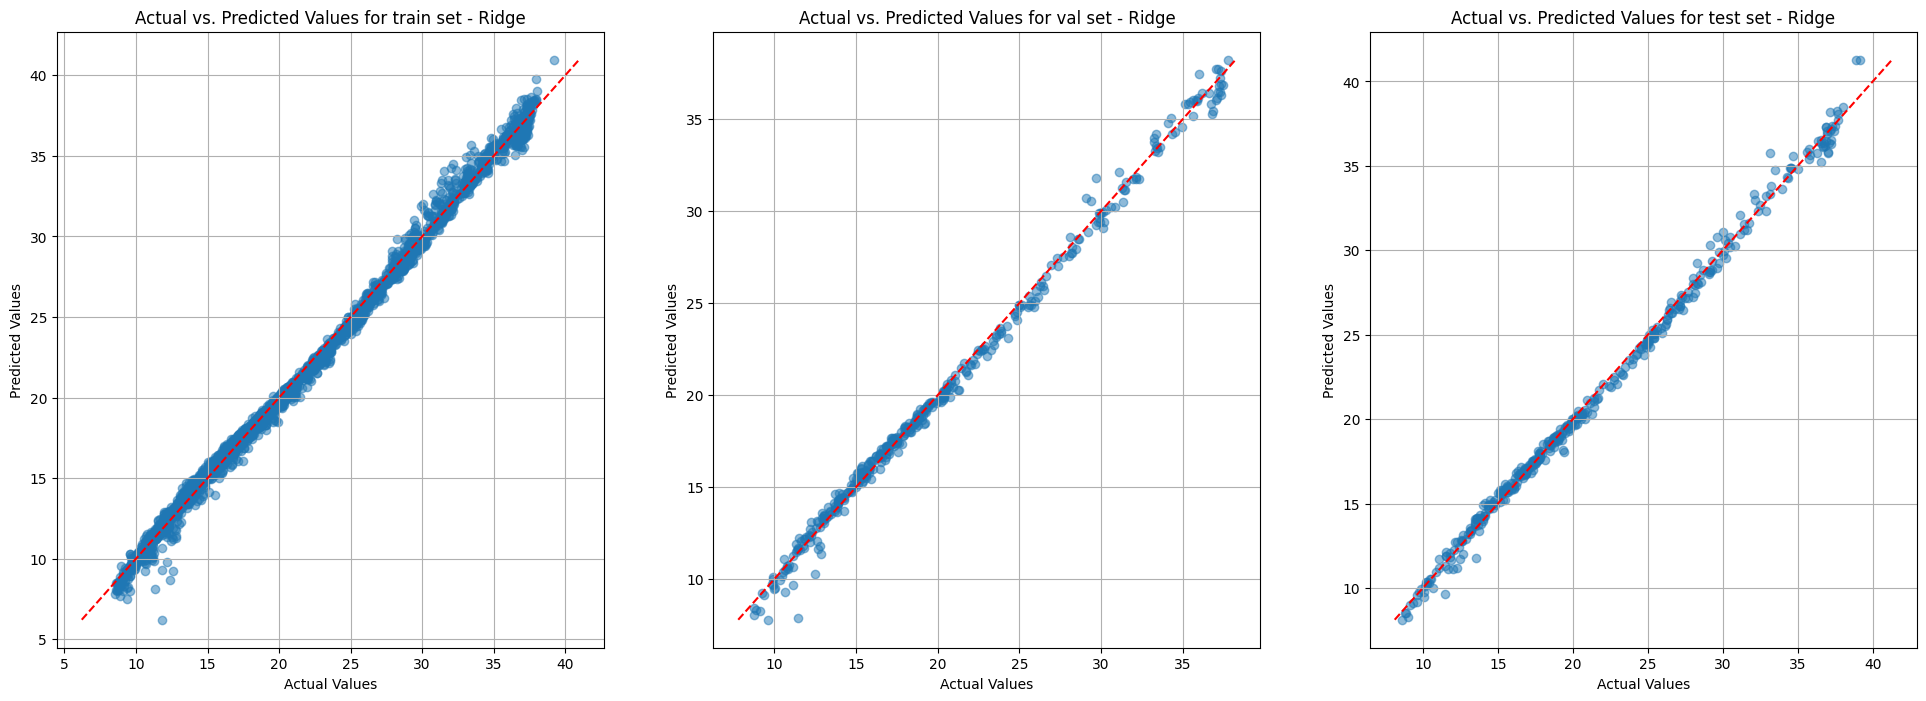

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))  # 1 row, 3 columns
set_d = ['train', 'val','test']
labels_set = [labels_train.squeeze(), labels_validation.squeeze(), labels_test.squeeze()]

for i in range(3):
    axs[i].scatter(labels_set[i], predictions_list[set_d[i]], alpha=0.5)
    axs[i].set_title(f"Actual vs. Predicted Values for {set_d[i]} set - Ridge")
    axs[i].set_xlabel("Actual Values")
    axs[i].set_ylabel("Predicted Values")

    min_val = min(np.min(labels_set[i]), np.min(predictions_list[set_d[i]]))
    max_val = max(np.max(labels_set[i]), np.max(predictions_list[set_d[i]]))
    axs[i].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

    axs[i].grid(True)
plt.show()

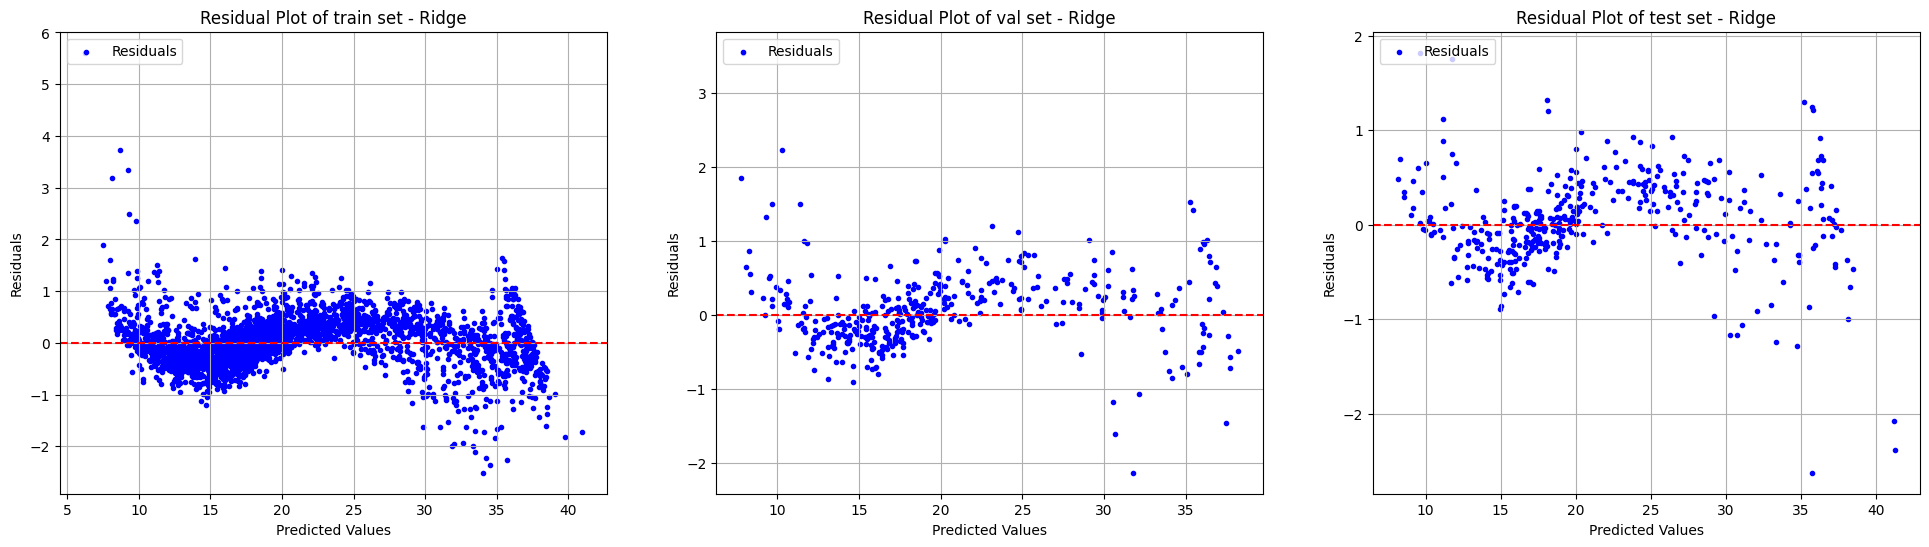

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))  # 1 row, 3 columns
residuals_set =  {'train':None,'test':None,'val':None}

for i in range(3):

    residuals = labels_set[i] - predictions_list[set_d[i]].squeeze()
    residuals_set[set_d[i]] = residuals

#     plt.figure(figsize=(8, 6))
    axs[i].scatter(predictions_list[set_d[i]], residuals, color='blue', marker='.', label='Residuals')
    axs[i].axhline(y=0, color='red', linestyle='--')
    axs[i].set_xlabel('Predicted Values')
    axs[i].set_ylabel('Residuals')
    axs[i].set_title(f'Residual Plot of {set_d[i]} set - Ridge')
    axs[i].legend(loc='upper left')
    axs[i].grid(True)
plt.show()

3199
400
400


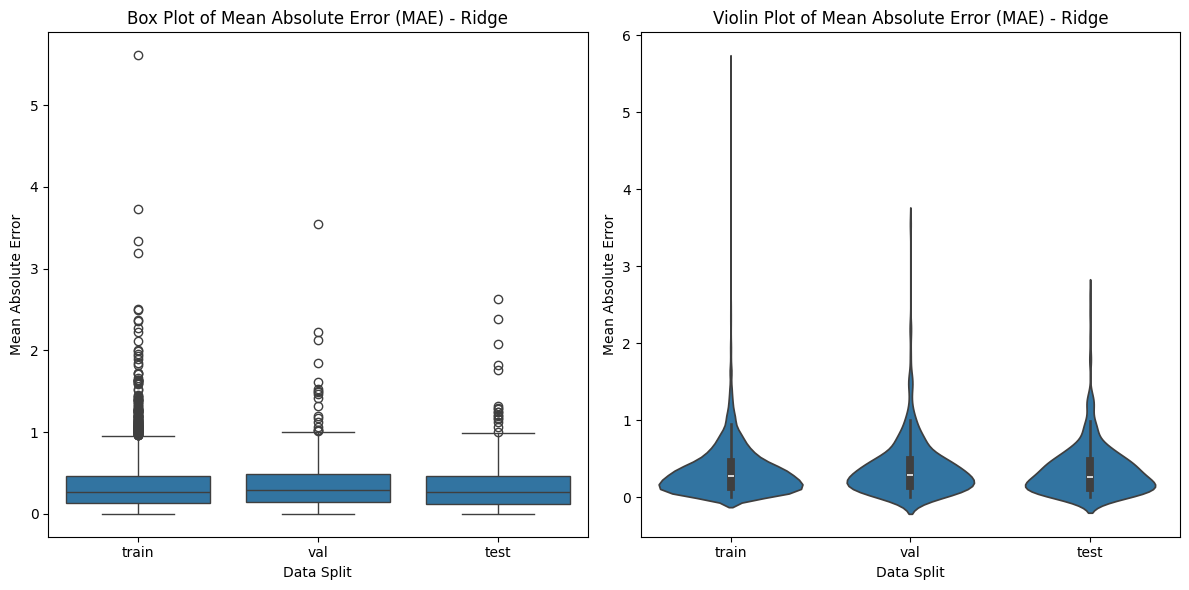

In [ ]:
#train, test, val
df_list =[]
for i in range(3):
    num_samples = residuals_set[set_d[i]].shape[0]
    print(num_samples)
    mae_values = [abs(residuals_set[set_d[i]][j]) for j in range(num_samples)]
    df_list.append(pd.DataFrame(mae_values, columns=['MAE']))
    df_list[i]['Data Split'] = set_d[i]

combined_mae_df = pd.concat([df_list[0], df_list[1], df_list[2]])

plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Data Split', y='MAE', data=combined_mae_df)
# sns.boxplot(data=mae_df, y='MAE')
plt.title('Box Plot of Mean Absolute Error (MAE) - Ridge')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

# Violin plot
plt.subplot(1, 2, 2)
# sns.violinplot(data=mae_df, y='MAE')
sns.violinplot(x='Data Split', y='MAE', data=combined_mae_df)
plt.title('Violin Plot of Mean Absolute Error (MAE) - Ridge')
plt.xlabel('Data Split')
plt.ylabel('Mean Absolute Error')

plt.tight_layout()
plt.show()

In [ ]:
col_names_str = "T, tau, time, Volume, S_100, S_111, S_110, S_311, Curve_1-10, Curve_11-20, Curve_21-30, Curve_31-40, Curve_41-50, Curve_51-60, Curve_61-70, Curve_71-80, Avg_total, Avg_bulk, Avg_surf, Total_E, Formation_E, Avg_bonds, Std_bonds, Max_bonds, Min_bonds, N_bonds, angle_avg, angle_std, FCC, HCP, ICOS, DECA, q6q6_avg_total, q6q6_avg_bulk, q6q6_avg_surf"
cols = col_names_str.split(',')
cols =[c.strip() for c in cols]
# print(cols)
cols_np = np.array(cols)
print(cols_np)
print(cols_np.shape)

['T' 'tau' 'time' 'Volume' 'S_100' 'S_111' 'S_110' 'S_311' 'Curve_1-10'
 'Curve_11-20' 'Curve_21-30' 'Curve_31-40' 'Curve_41-50' 'Curve_51-60'
 'Curve_61-70' 'Curve_71-80' 'Avg_total' 'Avg_bulk' 'Avg_surf' 'Total_E'
 'Formation_E' 'Avg_bonds' 'Std_bonds' 'Max_bonds' 'Min_bonds' 'N_bonds'
 'angle_avg' 'angle_std' 'FCC' 'HCP' 'ICOS' 'DECA' 'q6q6_avg_total'
 'q6q6_avg_bulk' 'q6q6_avg_surf']
(35,)


## Shap Analysis

### Converting numpys to dataframes

In [ ]:
pd.options.display.max_columns = None
features_train_df = pd.DataFrame(features_train, columns=cols)
features_train_df.head()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.357143,0.0,1.0,0.121008,0.057915,0.107854,0.020307,0.029928,0.148205,0.102843,0.059438,0.001174,0.000000,0.000000,0.0,0.0,0.666721,0.328632,0.563220,0.881721,0.097807,0.392482,0.266821,0.996049,0.818133,0.115757,0.797784,0.641690,0.074483,0.056823,0.0,0.060976,0.907309,0.952472,0.863790
1,0.071429,0.0,1.0,0.094118,0.000000,0.140549,0.044758,0.033024,0.139037,0.069398,0.059438,0.021139,0.000000,0.000000,0.0,0.0,0.604777,0.326268,0.700351,0.906289,0.061205,0.235131,0.082807,0.988147,0.903067,0.089253,0.816472,0.725791,0.059987,0.049144,0.0,0.085366,0.908386,0.949666,0.944866
2,0.928571,0.0,1.0,0.128151,0.000000,0.113115,0.025280,0.002064,0.130634,0.169732,0.062704,0.027598,0.025641,0.022222,0.0,0.0,0.700475,0.471058,0.726992,0.879346,0.161850,0.741993,0.696828,0.998204,0.597269,0.123762,0.668383,0.442706,0.018324,0.016235,0.0,0.012195,0.728838,0.827630,0.562978
3,0.928571,0.0,1.0,0.115126,0.000000,0.051484,0.020721,0.004128,0.081742,0.141304,0.103201,0.042866,0.025641,0.044444,0.0,0.0,0.677566,0.433393,0.627610,0.892252,0.151954,0.756526,0.743001,0.992816,0.549163,0.110572,0.647262,0.485310,0.017322,0.002852,0.0,0.000000,0.664866,0.803323,0.380958
4,0.928571,0.0,1.0,0.006261,0.000000,0.001879,0.010361,0.004128,0.004966,0.051003,0.036577,0.014680,0.019231,0.000000,0.0,0.0,0.267679,0.425648,0.298146,0.994267,0.021339,0.698753,0.959020,0.985273,0.661096,0.005949,0.275268,0.149671,0.000000,0.000000,0.0,0.000000,0.047440,0.050969,0.058316


In [ ]:
features_test_df = pd.DataFrame(features_test, columns=cols)
features_test_df.head()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.642857,0.0,1.0,0.137815,0.034106,0.067644,0.030253,0.009288,0.141329,0.089465,0.094056,0.044040,0.025641,0.044444,0.000000,0.0,0.699216,0.434861,0.629781,0.867766,0.144070,0.586346,0.534771,0.970905,0.708974,0.132962,0.709989,0.586149,0.057617,0.015358,0.0,0.000000,0.830782,0.930319,0.641046
1,0.071429,0.0,1.0,0.113025,0.000000,0.197670,0.048902,0.000000,0.198625,0.000836,0.041803,0.037581,0.000000,0.000000,0.000000,0.0,0.634551,0.331812,0.739686,0.887331,0.070192,0.262313,0.068921,0.719828,0.892165,0.107702,0.846525,0.957676,0.097912,0.000000,0.0,0.000000,0.944114,0.984828,0.971144
2,0.928571,0.0,1.0,0.044118,0.000000,0.003382,0.012433,0.007224,0.010313,0.113712,0.081646,0.029360,0.070513,0.022222,0.000000,0.0,0.457858,0.262922,0.443878,0.959670,0.078529,0.798152,0.934918,0.971264,0.556526,0.040876,0.481406,0.177720,0.000000,0.000000,0.0,0.000000,0.024286,0.024908,0.031550
3,1.000000,0.9,0.0,0.021807,0.000000,0.001127,0.003315,0.002064,0.009549,0.078595,0.045069,0.022901,0.089744,0.111111,0.058824,0.0,0.197612,0.026333,0.000000,0.979421,0.037220,0.707365,0.993283,0.946121,0.330810,0.018708,0.444691,0.093384,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.004378
4,0.928571,0.0,1.0,0.158403,0.003218,0.090192,0.018235,0.006192,0.123377,0.184783,0.095363,0.032883,0.070513,0.044444,0.058824,0.0,0.719160,0.418718,0.648071,0.851018,0.195826,0.774468,0.692651,0.993894,0.675868,0.152926,0.685985,0.500107,0.027806,0.018210,0.0,0.036585,0.716461,0.814078,0.491552


### SHAP value calculation

In [ ]:
type(best_ridge)

sklearn.linear_model._ridge.Ridge

In [ ]:
# features_train
train_feature_sample_df = shap.utils.sample(features_train_df, 2500)
print(train_feature_sample_df.shape)

LR_model = best_ridge

# explainer__ = shap.Explainer(LR_model.predict, train_feature_sample_df) #this was probly from chatgpt!
explainer__ = shap.Explainer(LR_model, train_feature_sample_df)
shap_values = explainer__(features_test_df)
print(shap_values.feature_names)

(2500, 35)
['T', 'tau', 'time', 'Volume', 'S_100', 'S_111', 'S_110', 'S_311', 'Curve_1-10', 'Curve_11-20', 'Curve_21-30', 'Curve_31-40', 'Curve_41-50', 'Curve_51-60', 'Curve_61-70', 'Curve_71-80', 'Avg_total', 'Avg_bulk', 'Avg_surf', 'Total_E', 'Formation_E', 'Avg_bonds', 'Std_bonds', 'Max_bonds', 'Min_bonds', 'N_bonds', 'angle_avg', 'angle_std', 'FCC', 'HCP', 'ICOS', 'DECA', 'q6q6_avg_total', 'q6q6_avg_bulk', 'q6q6_avg_surf']


### SHAP to Dataframe

In [ ]:
#shap values converted to a dataframe

print(type(shap_values))
print(type(shap_values.values))
shap_values_df = pd.DataFrame(shap_values.values, columns=cols)
shap_values_abs_df = shap_values_df.abs()
shap_values_df.head()

<class 'shap._explanation.Explanation'>
<class 'numpy.ndarray'>


,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
0,0.011917,-0.159337,-0.035083,-0.339220,0.199440,0.007694,-0.016659,0.014309,0.518851,-1.309594,-1.853652,-0.715615,-0.086566,0.040971,-0.047940,-0.005384,0.509223,-0.208780,0.000905,-3.606471,-0.303544,0.034065,-0.026805,-0.000215,-0.000839,4.117281,0.032448,0.122892,0.034728,0.001808,0.005475,0.049413,2.306474,-1.729118,-0.539890
1,-0.054936,-0.159337,-0.035083,-0.390313,-0.064554,1.004806,-0.009384,0.022209,1.268059,-2.293484,-2.507095,-0.784611,-0.104935,0.061559,-0.047940,-0.005384,-0.236075,0.184592,-0.091930,-4.036577,-0.584049,0.297166,-0.319301,-0.114957,-0.002597,4.757337,0.148297,0.493635,0.008168,0.002773,0.005475,0.049413,3.218240,-2.006782,-1.526782
2,0.045343,-0.159337,-0.035083,-0.532332,-0.064554,-0.485098,-0.023611,0.016064,-1.194336,-1.040417,-2.008845,-0.872424,-0.054419,0.051265,-0.047940,-0.005384,-2.272536,0.447567,0.157935,-5.626764,-0.552393,-0.137912,0.224437,-0.000051,0.000624,6.450631,-0.161504,-0.284676,0.072705,0.002773,0.005475,0.049413,-4.181808,2.882958,1.282322
3,0.053700,0.461456,0.102199,-0.578315,-0.064554,-0.502388,-0.027168,0.020454,-1.204326,-1.430260,-2.466255,-0.941420,-0.040642,0.010088,-0.020388,-0.005384,-5.271987,1.350704,0.532873,-6.060957,-0.709239,-0.064197,0.261084,-0.011541,0.002790,7.012357,-0.192657,-0.368835,0.072705,0.002773,0.005475,0.049413,-4.377187,3.009838,1.363559
4,0.045343,-0.159337,-0.035083,-0.296788,-0.039649,0.180604,-0.021348,0.016942,0.284099,-0.251449,-1.837316,-0.834790,-0.054419,0.040971,-0.020388,-0.005384,0.739086,-0.147160,-0.014544,-3.238317,-0.107037,-0.118682,0.072324,0.010291,-0.000521,3.611415,0.012080,0.037031,0.054378,0.001629,0.005475,0.010909,1.386766,-1.136998,-0.092947


In [ ]:
shap_values_df.describe()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,-0.007772,-0.005173,-0.007589,-0.100670,0.042401,0.118508,-0.006745,-0.002247,0.183031,-0.444723,-0.396394,-0.218655,-0.015086,0.006537,-0.014947,-0.001458,-0.043357,-0.052356,-0.001473,-1.042227,-0.153909,0.045690,-0.039664,-0.002408,-0.000282,1.226674,0.016953,0.048857,0.003193,-0.000382,0.001141,0.002936,0.757620,-0.538033,-0.278964
std,0.037465,0.220947,0.042403,0.566382,0.332519,0.901307,0.024386,0.056614,1.676346,1.720886,2.551145,1.066517,0.107131,0.070692,0.059381,0.013835,1.876132,0.502768,0.129424,5.992447,0.642959,0.176845,0.165373,0.026786,0.001833,6.894989,0.120254,0.218280,0.108780,0.007069,0.022424,0.119736,2.833233,1.924560,0.972184
min,-0.063293,-0.159337,-0.035083,-0.623258,-0.064554,-0.508152,-0.028461,-0.619487,-1.304220,-2.302766,-2.923664,-1.167226,-0.104935,-0.401677,-0.047940,-0.005384,-5.671320,-1.661206,-0.294813,-6.497770,-0.842257,-0.294956,-0.357259,-0.184229,-0.003378,-17.852469,-0.352389,-0.371055,-0.560475,-0.044183,-0.268268,-0.983760,-4.377187,-2.051315,-1.591564
25%,-0.046580,-0.159337,-0.035083,-0.487301,-0.064554,-0.364781,-0.020216,-0.003248,-0.794759,-1.653027,-2.164038,-0.899082,-0.091158,-0.031088,-0.047940,-0.005384,-1.125096,-0.249471,-0.087521,-5.100035,-0.618847,-0.101746,-0.161748,-0.003334,-0.001541,-1.423137,-0.052510,-0.115404,0.000581,0.000675,0.005475,0.010909,-1.027360,-1.911516,-1.072748
50%,-0.013153,-0.159337,-0.035083,-0.364333,-0.049611,-0.087406,-0.014234,0.012553,-0.232854,-0.975443,-1.522847,-0.627802,-0.059012,0.035824,-0.047940,-0.005384,0.193220,-0.047261,-0.021634,-3.829917,-0.386551,0.045356,-0.043728,0.007828,-0.000561,4.431848,0.025792,0.081919,0.050141,0.002429,0.005475,0.049413,2.128677,-1.610554,-0.531541
75%,0.020273,0.133815,0.010678,0.119744,0.010161,0.236800,-0.002149,0.018698,0.575042,0.296188,0.596756,0.026093,0.029391,0.061559,0.007163,-0.005384,1.273247,0.212990,0.072665,1.170556,0.186213,0.176050,0.085889,0.011604,0.000557,5.906770,0.100411,0.192785,0.070903,0.002773,0.005475,0.049413,2.842159,0.538947,0.564770
max,0.053700,0.530433,0.102199,1.429090,2.774632,6.935601,0.197560,0.022209,11.342401,8.204432,8.625929,5.882921,0.487477,0.061559,0.365338,0.084352,3.961844,1.361908,0.532873,15.312207,2.462846,0.486043,0.261084,0.013081,0.005964,7.472037,0.262463,0.519337,0.072705,0.002773,0.005475,0.049413,3.637012,3.009838,1.363559


In [ ]:
shap_values_abs_df.describe()

,T,tau,time,Volume,S_100,S_111,S_110,S_311,Curve_1-10,Curve_11-20,Curve_21-30,Curve_31-40,Curve_41-50,Curve_51-60,Curve_61-70,Curve_71-80,Avg_total,Avg_bulk,Avg_surf,Total_E,Formation_E,Avg_bonds,Std_bonds,Max_bonds,Min_bonds,N_bonds,angle_avg,angle_std,FCC,HCP,ICOS,DECA,q6q6_avg_total,q6q6_avg_bulk,q6q6_avg_surf
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.033592,0.189214,0.038218,0.480094,0.118003,0.463730,0.018012,0.024111,1.002161,1.418791,2.159433,0.872641,0.086310,0.055730,0.046744,0.008449,1.460458,0.372768,0.100414,5.058633,0.550872,0.150743,0.143638,0.015441,1.466160e-03,5.826435,0.096355,0.190032,0.078427,0.004026,0.009344,0.066133,2.735356,1.888452,0.908553
std,0.018247,0.113809,0.019787,0.316038,0.313706,0.781568,0.017750,0.051258,1.355314,1.068508,1.411037,0.649598,0.065094,0.043893,0.039491,0.011045,1.176211,0.340909,0.081514,3.368157,0.364586,0.102891,0.090784,0.022006,1.133908e-03,3.875170,0.073768,0.117628,0.075346,0.005820,0.020412,0.099804,1.049626,0.647260,0.442290
min,0.003560,0.021383,0.004576,0.000626,0.000199,0.000951,0.000006,0.000263,0.004395,0.000835,0.016826,0.024525,0.000689,0.000206,0.007163,0.005384,0.011362,0.001600,0.000083,0.042562,0.000873,0.001554,0.001583,0.000051,2.968510e-07,0.035127,0.000172,0.000073,0.000906,0.000044,0.005475,0.001925,0.033518,0.047071,0.004905
25%,0.018493,0.159337,0.035083,0.313025,0.040047,0.135921,0.010030,0.010666,0.375203,0.749102,1.386033,0.514899,0.045235,0.031088,0.020388,0.005384,0.508584,0.126685,0.040222,3.321524,0.312206,0.061575,0.063676,0.006920,5.607422e-04,3.771117,0.039373,0.094586,0.041465,0.002067,0.005475,0.042995,2.042883,1.578876,0.538909
50%,0.036986,0.159337,0.035083,0.441838,0.059573,0.324205,0.017144,0.016942,0.759796,1.379209,1.976173,0.815408,0.081973,0.051265,0.047940,0.005384,1.212172,0.234187,0.079573,4.680186,0.541973,0.137560,0.141782,0.010947,1.277030e-03,5.391620,0.079728,0.181922,0.064082,0.002746,0.005475,0.049413,2.811888,1.897107,1.007132
75%,0.053700,0.165890,0.035083,0.555063,0.064554,0.470688,0.021671,0.020454,1.140993,1.883824,2.509137,1.018257,0.104935,0.061559,0.047940,0.005384,2.164447,0.565973,0.140552,5.817965,0.695742,0.220878,0.210287,0.012753,2.133215e-03,6.745459,0.146988,0.273994,0.072705,0.002773,0.005475,0.049413,3.469593,2.013821,1.290020
max,0.063293,0.530433,0.102199,1.429090,2.774632,6.935601,0.197560,0.619487,11.342401,8.204432,8.625929,5.882921,0.487477,0.401677,0.365338,0.084352,5.671320,1.661206,0.532873,15.312207,2.462846,0.486043,0.357259,0.184229,5.963998e-03,17.852469,0.352389,0.519337,0.560475,0.044183,0.268268,0.983760,4.377187,3.009838,1.591564


In [ ]:
sorted_columns = shap_values_abs_df.describe().loc['mean'].sort_values(ascending=False).index
shap_values_abs_df_describe_sorted = shap_values_abs_df.describe()[sorted_columns]
shap_values_abs_df_describe_sorted

,N_bonds,Total_E,q6q6_avg_total,Curve_21-30,q6q6_avg_bulk,Avg_total,Curve_11-20,Curve_1-10,q6q6_avg_surf,Curve_31-40,Formation_E,Volume,S_111,Avg_bulk,angle_std,tau,Avg_bonds,Std_bonds,S_100,Avg_surf,angle_avg,Curve_41-50,FCC,DECA,Curve_51-60,Curve_61-70,time,T,S_311,S_110,Max_bonds,ICOS,Curve_71-80,HCP,Min_bonds
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02
mean,5.826435,5.058633,2.735356,2.159433,1.888452,1.460458,1.418791,1.002161,0.908553,0.872641,0.550872,0.480094,0.463730,0.372768,0.190032,0.189214,0.150743,0.143638,0.118003,0.100414,0.096355,0.086310,0.078427,0.066133,0.055730,0.046744,0.038218,0.033592,0.024111,0.018012,0.015441,0.009344,0.008449,0.004026,1.466160e-03
std,3.875170,3.368157,1.049626,1.411037,0.647260,1.176211,1.068508,1.355314,0.442290,0.649598,0.364586,0.316038,0.781568,0.340909,0.117628,0.113809,0.102891,0.090784,0.313706,0.081514,0.073768,0.065094,0.075346,0.099804,0.043893,0.039491,0.019787,0.018247,0.051258,0.017750,0.022006,0.020412,0.011045,0.005820,1.133908e-03
min,0.035127,0.042562,0.033518,0.016826,0.047071,0.011362,0.000835,0.004395,0.004905,0.024525,0.000873,0.000626,0.000951,0.001600,0.000073,0.021383,0.001554,0.001583,0.000199,0.000083,0.000172,0.000689,0.000906,0.001925,0.000206,0.007163,0.004576,0.003560,0.000263,0.000006,0.000051,0.005475,0.005384,0.000044,2.968510e-07
25%,3.771117,3.321524,2.042883,1.386033,1.578876,0.508584,0.749102,0.375203,0.538909,0.514899,0.312206,0.313025,0.135921,0.126685,0.094586,0.159337,0.061575,0.063676,0.040047,0.040222,0.039373,0.045235,0.041465,0.042995,0.031088,0.020388,0.035083,0.018493,0.010666,0.010030,0.006920,0.005475,0.005384,0.002067,5.607422e-04
50%,5.391620,4.680186,2.811888,1.976173,1.897107,1.212172,1.379209,0.759796,1.007132,0.815408,0.541973,0.441838,0.324205,0.234187,0.181922,0.159337,0.137560,0.141782,0.059573,0.079573,0.079728,0.081973,0.064082,0.049413,0.051265,0.047940,0.035083,0.036986,0.016942,0.017144,0.010947,0.005475,0.005384,0.002746,1.277030e-03
75%,6.745459,5.817965,3.469593,2.509137,2.013821,2.164447,1.883824,1.140993,1.290020,1.018257,0.695742,0.555063,0.470688,0.565973,0.273994,0.165890,0.220878,0.210287,0.064554,0.140552,0.146988,0.104935,0.072705,0.049413,0.061559,0.047940,0.035083,0.053700,0.020454,0.021671,0.012753,0.005475,0.005384,0.002773,2.133215e-03
max,17.852469,15.312207,4.377187,8.625929,3.009838,5.671320,8.204432,11.342401,1.591564,5.882921,2.462846,1.429090,6.935601,1.661206,0.519337,0.530433,0.486043,0.357259,2.774632,0.532873,0.352389,0.487477,0.560475,0.983760,0.401677,0.365338,0.102199,0.063293,0.619487,0.197560,0.184229,0.268268,0.084352,0.044183,5.963998e-03


In [ ]:
tmp__ = shap_values_abs_df_describe_sorted.loc[['mean','std']]
tmp__.to_csv('LR_summary_shap_descending_order.csv', index=False)
tmp__.head()

,N_bonds,Total_E,q6q6_avg_total,Curve_21-30,q6q6_avg_bulk,Avg_total,Curve_11-20,Curve_1-10,q6q6_avg_surf,Curve_31-40,Formation_E,Volume,S_111,Avg_bulk,angle_std,tau,Avg_bonds,Std_bonds,S_100,Avg_surf,angle_avg,Curve_41-50,FCC,DECA,Curve_51-60,Curve_61-70,time,T,S_311,S_110,Max_bonds,ICOS,Curve_71-80,HCP,Min_bonds
mean,5.826435,5.058633,2.735356,2.159433,1.888452,1.460458,1.418791,1.002161,0.908553,0.872641,0.550872,0.480094,0.463730,0.372768,0.190032,0.189214,0.150743,0.143638,0.118003,0.100414,0.096355,0.086310,0.078427,0.066133,0.055730,0.046744,0.038218,0.033592,0.024111,0.018012,0.015441,0.009344,0.008449,0.004026,0.001466
std,3.875170,3.368157,1.049626,1.411037,0.647260,1.176211,1.068508,1.355314,0.442290,0.649598,0.364586,0.316038,0.781568,0.340909,0.117628,0.113809,0.102891,0.090784,0.313706,0.081514,0.073768,0.065094,0.075346,0.099804,0.043893,0.039491,0.019787,0.018247,0.051258,0.017750,0.022006,0.020412,0.011045,0.005820,0.001134


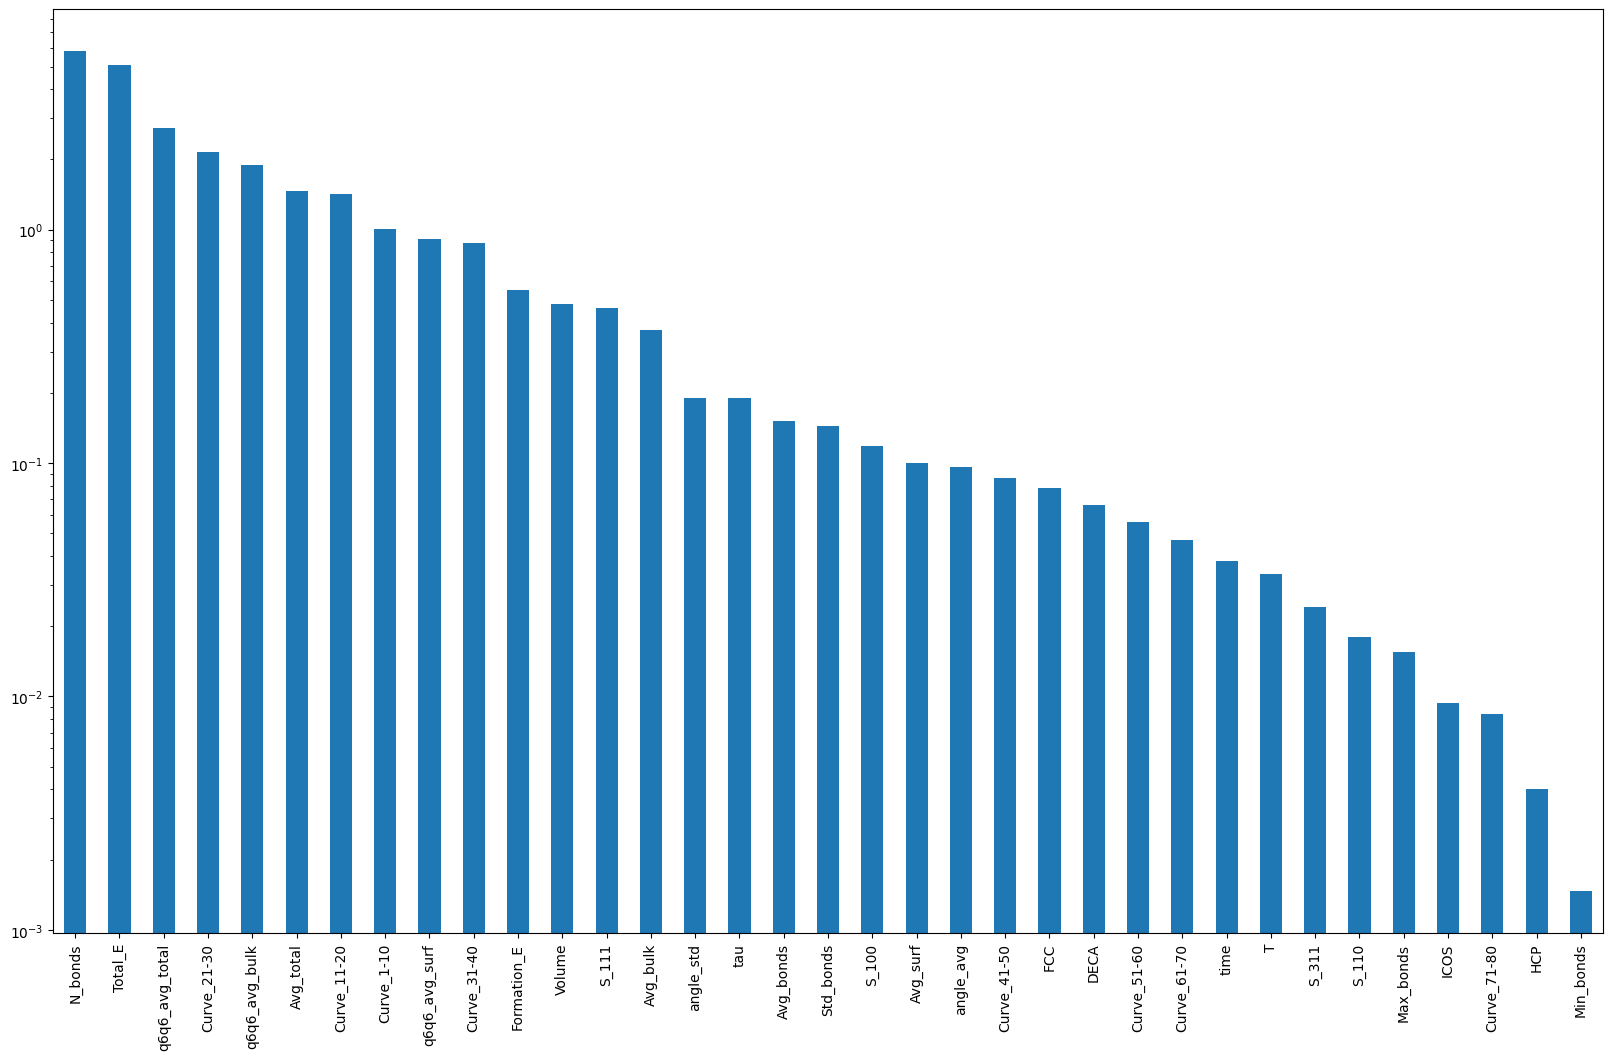

In [ ]:
plt.figure(figsize=(20, 12))
shap_values_abs_df_describe_sorted.loc['mean'].plot(kind='bar',logy=True)
plt.show()

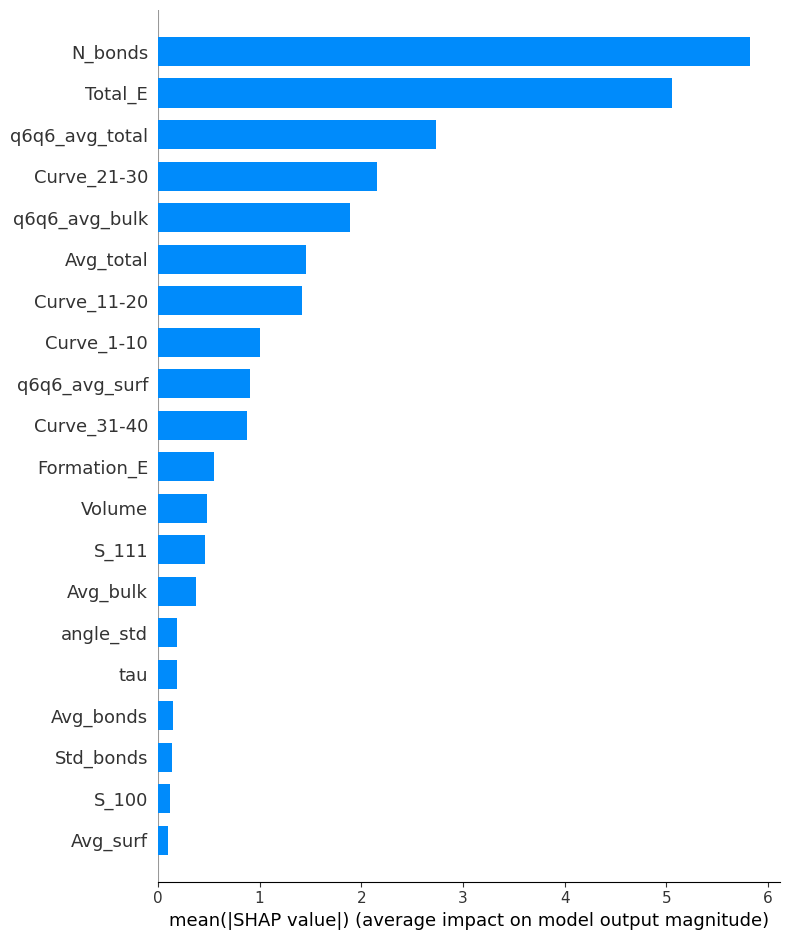

In [ ]:
#SHAP API for the above bar plot -same results but nnot in log scale
shap.summary_plot(shap_values, features_test_df, plot_type="bar")

In [ ]:
print(features_test.shape)
print(predictions_list['test'][0]) # predicted value
print(labels_test[0]) #original labels
print(set_d)

(400, 35)
[19.32064582]
[19.7274]
['train', 'val', 'test']


In [ ]:
test_residu = []
for i in range(labels_test.shape[0]):
    test_residu.append((labels_test[i] - predictions_list['test'][i])[0])

In [ ]:
test_residu_np = np.array(test_residu)
test_residu_np_abs = np.abs(test_residu_np)
print(test_residu_np.shape)
print(test_residu_np_abs.sum()/400) #sanity test to check if we get the MAE loss correctly
sorted_indices = np.argsort(test_residu_np_abs)
print(sorted_indices[:10])

(400,)
0.34995771264470044
[128 273  95  44 197   1  32 218 239  85]


In [ ]:
len(sorted_indices) #numbe of test samples
samples_ = (labels_test.shape[0]*10)//100 # number of samples for 10%
worst_set_ind = sorted_indices[-1*samples_:] # worst 10% - when ascending order based sorted, highest values are in the right side
best_set_ind = sorted_indices[:samples_] # best 10% - when ascending order based sorted, smallest values are to the left

#we need the corrosponding shap values
best_10 = shap_values[best_set_ind]
worst_10 = shap_values[worst_set_ind]

print(best_10.shape)
print(worst_10.shape)

best_10_values = test_residu_np[list(best_set_ind)] #best 10% of residual values - closest to zero
worst_10_values = test_residu_np[list(worst_set_ind)] #worst 10% of residual values - furthest from zero

print(best_10_values.shape)
print(worst_10_values.shape)

(40, 35)
(40, 35)
(40,)
(40,)


In [ ]:
best_10_values

array([-0.00064447,  0.00091217, -0.00202083, -0.00260949,  0.00323483,
        0.00581135, -0.00691118, -0.0070954 , -0.00857356,  0.00963369,
        0.0099346 ,  0.01062269, -0.01131363,  0.01137177,  0.01336274,
       -0.01462374,  0.01496083,  0.01838145,  0.01846242,  0.02238794,
        0.02282186, -0.02522841, -0.02684937,  0.02853804, -0.02887582,
        0.03345364, -0.03471472, -0.03527618,  0.03561898, -0.03596458,
        0.03709162, -0.03721298, -0.03724325, -0.0377508 ,  0.03796891,
        0.04007551, -0.04029365, -0.04406887, -0.04472858,  0.04561276])

In [ ]:
worst_10_values

array([ 0.69200792,  0.70450039, -0.71340279,  0.72632742,  0.73127171,
       -0.73179635,  0.7441161 ,  0.76952115,  0.80551491,  0.83629932,
       -0.84621448, -0.85681822, -0.86876394,  0.87739644,  0.88128608,
        0.88474334, -0.89759212, -0.91869337,  0.92169799,  0.92342117,
        0.92708124, -0.97027896,  0.98540579, -0.99482388, -1.06477983,
        1.12334694, -1.16533692, -1.17099161,  1.20123501,  1.21305393,
        1.24250768, -1.24563977, -1.2815604 ,  1.29441615,  1.31984955,
        1.75565149,  1.81997977, -2.07428206, -2.38150517, -2.62555042])

### Best/Worst distribution on residual plots

In [ ]:
##

# SHAP results

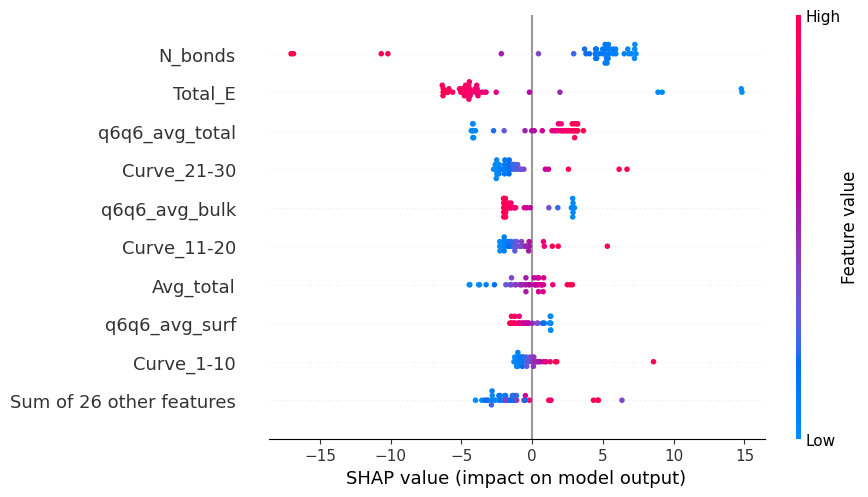

In [ ]:
shap.plots.beeswarm(best_10,max_display=10)

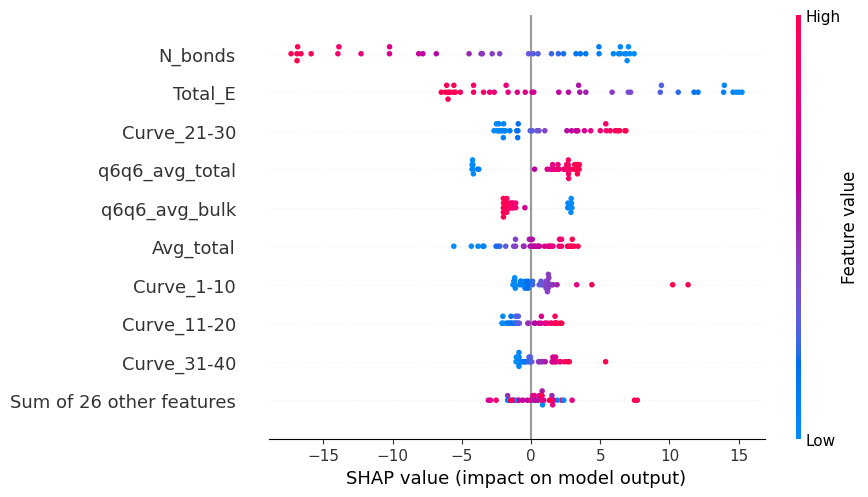

In [ ]:
shap.plots.beeswarm(worst_10,max_display=10)

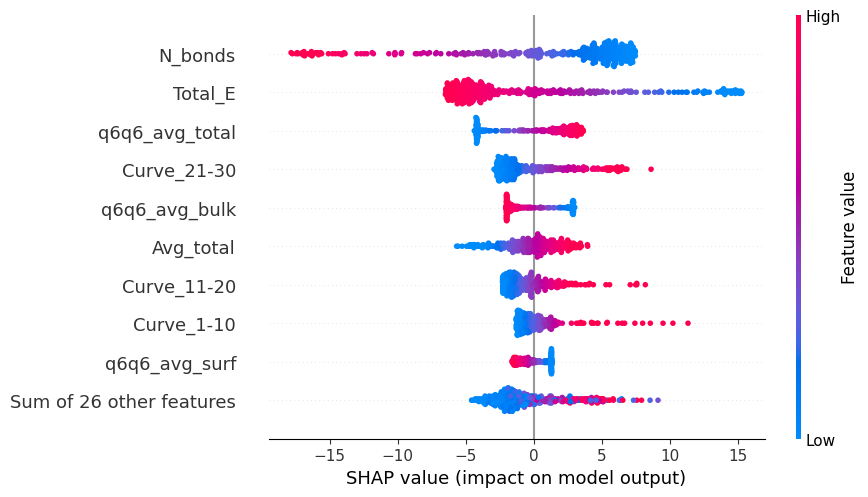

In [ ]:
shap.plots.beeswarm(shap_values,max_display=10)

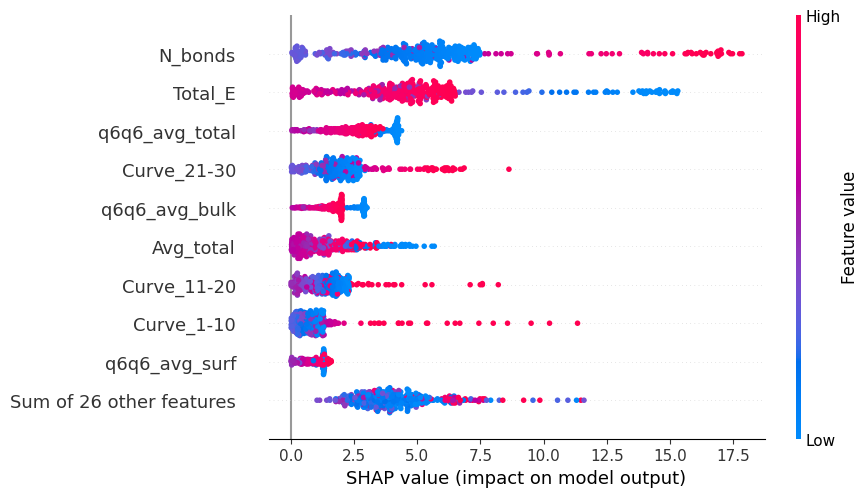

In [ ]:
shap.plots.beeswarm(shap_values.abs, max_display=10)

### SHAP for a given sample

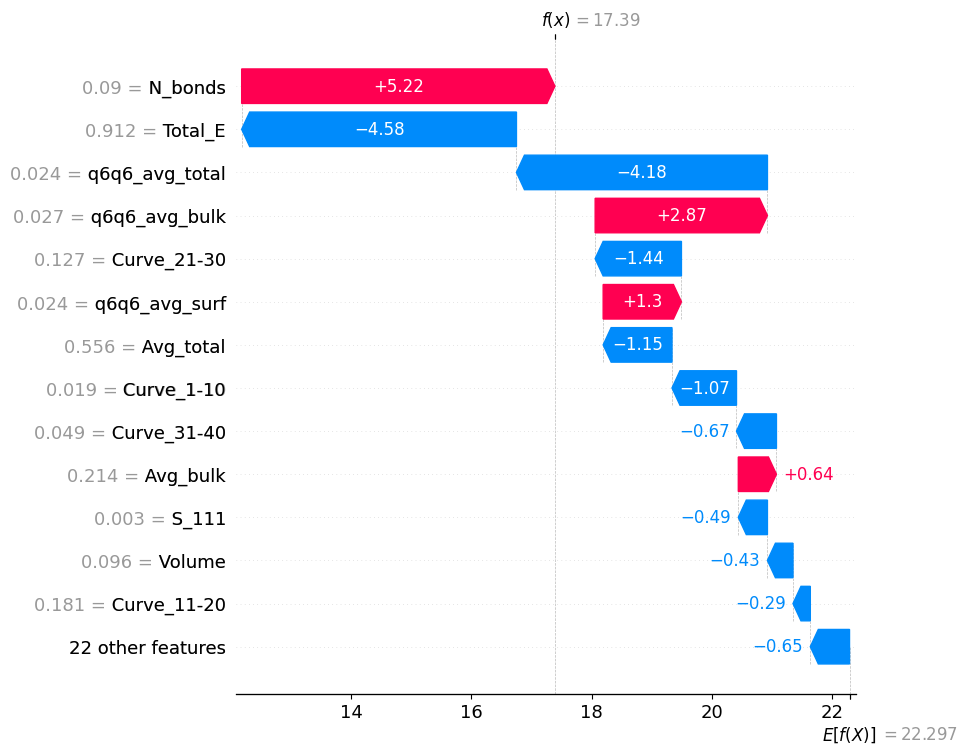

In [ ]:
shap.plots.waterfall(shap_values[12], max_display=14)

In [ ]:
print(labels_test[12])
print(labels_test[12] - predictions_list['test'][12])
print(predictions_list['test'][12])
print(sum(predictions_list['test'])/400)
# print(sum(labels_test)/400)

[17.5341]
[0.14416414]
[17.38993586]
[21.3764932]


# SHAP Full view

In [ ]:
features_num = best_10.shape[1]

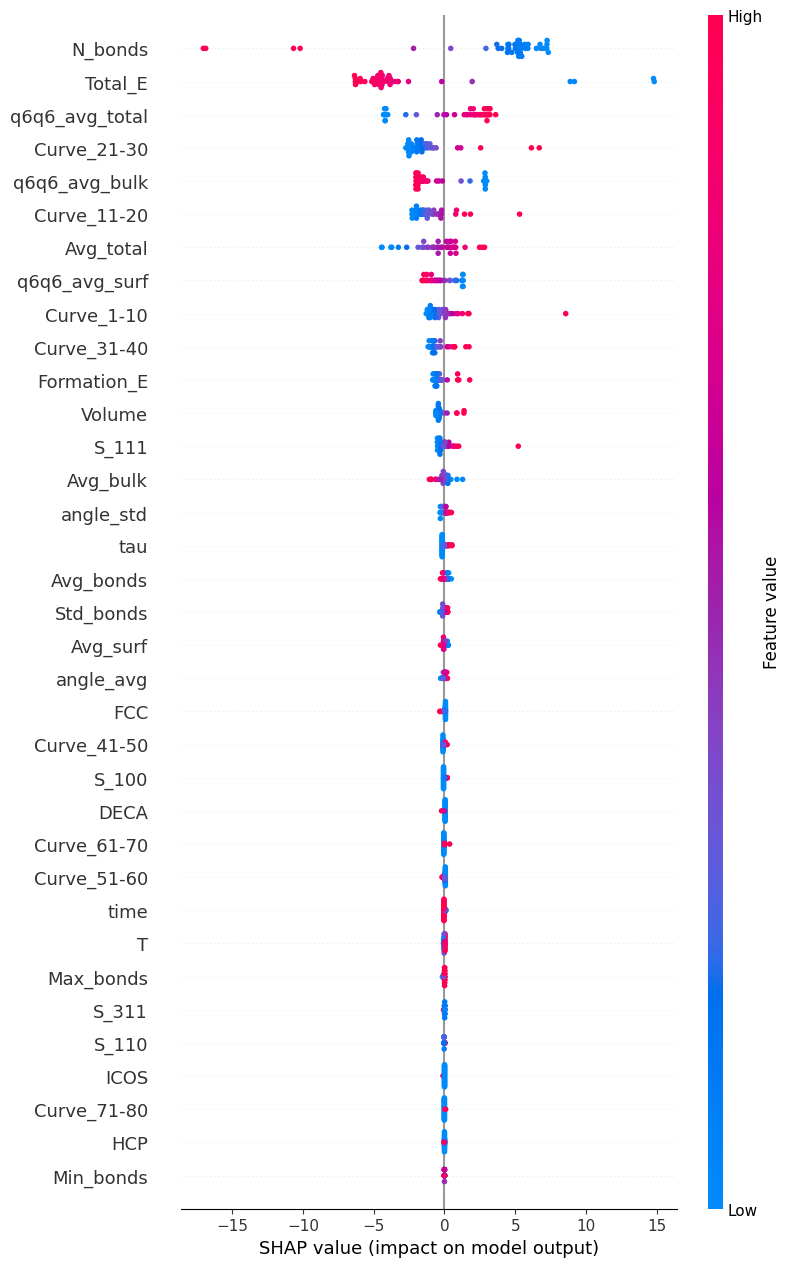

In [ ]:
shap.plots.beeswarm(best_10,max_display=features_num)

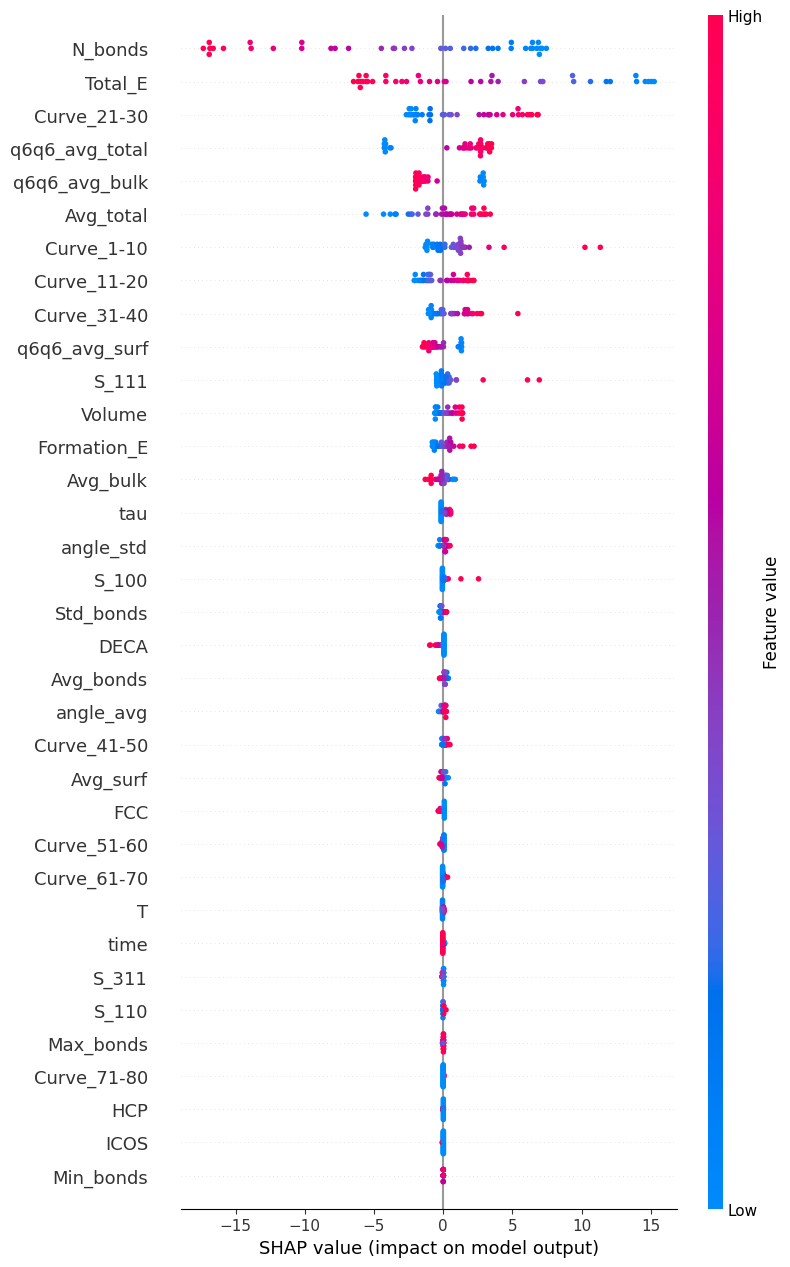

In [ ]:
shap.plots.beeswarm(worst_10,max_display=features_num)

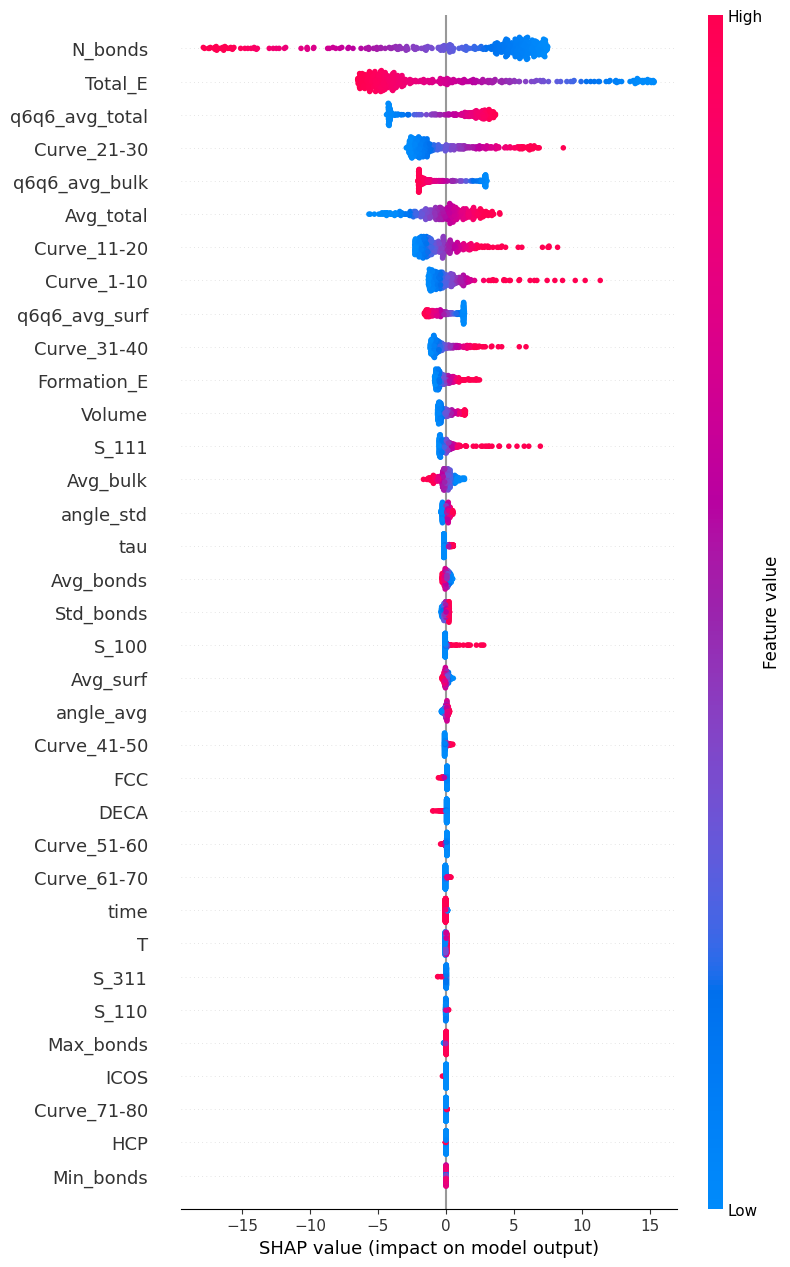

In [ ]:
shap.plots.beeswarm(shap_values,max_display=features_num)

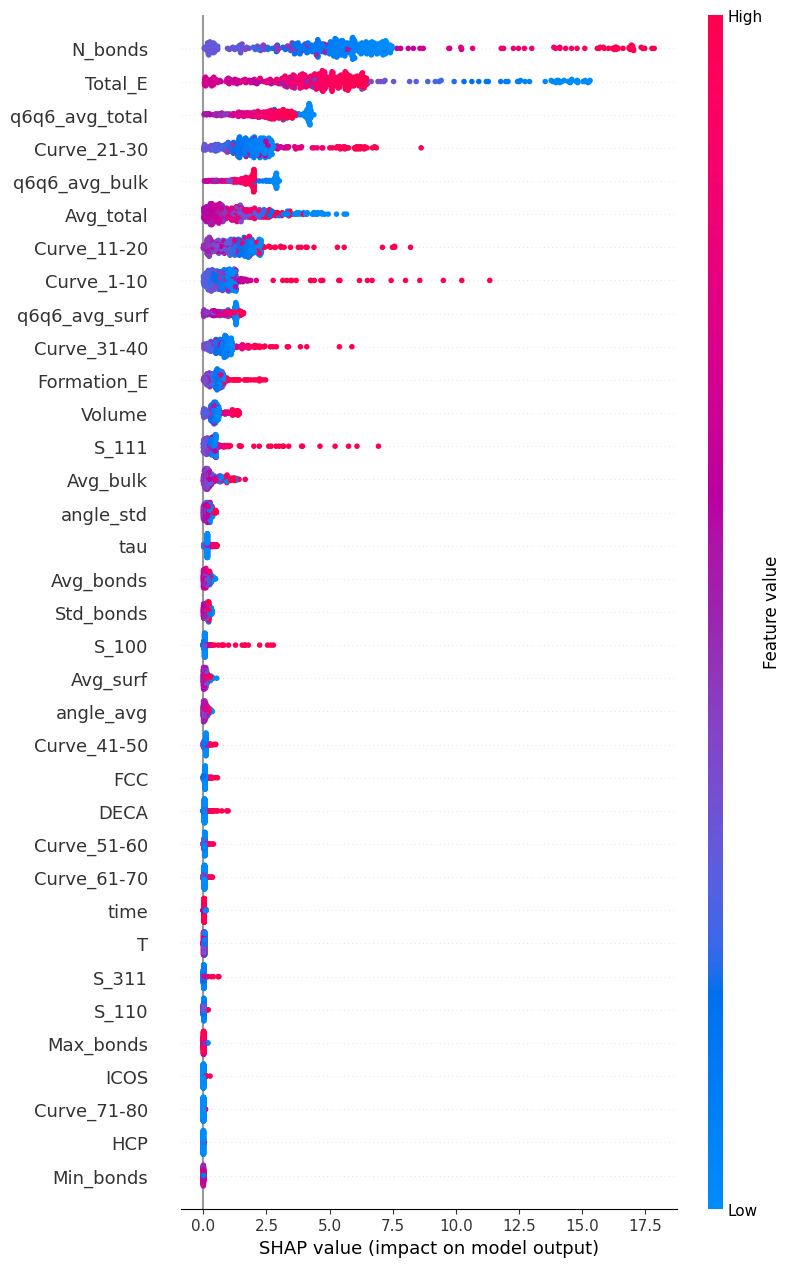

In [ ]:
shap.plots.beeswarm(shap_values.abs, max_display=features_num)
